In [1]:
import os
import utils.DataProcessing as DP
import utils.LSTM as lstm
import pickle
import json

import torch
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn as nn
from torch.autograd import Variable

In [2]:
model = torch.load('data/model/lstm_model.pt')

In [3]:
pos_filename = "data/json/pos.json"
neg_filename = "data/json/neg.json"
pos_test_filename = "data/json/pos_test.json"
neg_test_filename = "data/json/neg_test.json"
stopword_filename = "data/json/stopword.json"

In [4]:
pos_file = open(pos_filename)
pos_data = json.load(pos_file)

neg_file = open(neg_filename)
neg_data = json.load(neg_file)
dataset = pos_data + neg_data
train_dataset = dataset.copy()

In [5]:
pos_test_file = open(pos_test_filename)
pos_test_data = json.load(pos_test_file)

neg_test_file = open(neg_test_filename)
neg_test_data = json.load(neg_test_file)

test_dataset = pos_test_data + neg_test_data

In [6]:
print(len(test_dataset))
print(len(pos_test_data))
print(len(neg_test_data))

81
68
13


In [8]:
stopword_file = open(stopword_filename)
stopword = json.load(stopword_file)

In [9]:
use_prev_corpus = True
if use_prev_corpus:
    corpus_file = open("data/dicts/corpus.pickle", 'rb')
    corpus = pickle.load(corpus_file)
else:
    corpus = DP.Corpus(data=dataset, 
                       dictionary_word=[], 
                       stopwords=stopword)
    corpus_file = open("data/dicts/corpus.pickle", 'wb')
    pickle.dump(corpus, corpus_file)

In [10]:
epochs = 100
batch_size = 2000
#embedding_dim = int(len(corpus.dictionary) ** 0.25)
embedding_dim = 15
hidden_dim = 5
sent_size = 15
nlabel = 2
lr = 0.05
use_gpu = torch.cuda.is_available()
corpus_size = len(corpus.dictionary.words)

In [11]:
len(corpus.dictionary)

21172

In [12]:
print(len(dataset))
print(len(train_dataset))
print(len(test_dataset))

51037
51037
81


In [11]:
model = lstm.LSTMClassifier(embedding_dim, 
                            hidden_dim,
                            corpus_size, 
                            nlabel, 
                            batch_size)
if use_gpu: model = model.cuda()
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
loss_fn = nn.CrossEntropyLoss()

In [12]:
list_train_loss = []
list_train_acc = []
for epoch in range(epochs):
    #def __init__(self, data, sent_size, corpus, dtype=""):
    dtrain_set = DP.CommentDataset(dataset=train_dataset, 
                                   sent_size=sent_size, 
                                   corpus=corpus, 
                                   dtype="train")
    train_loader = DataLoader(dtrain_set,
                             batch_size=batch_size,
                             shuffle=True,
                             num_workers=4)
    for i, train_data in enumerate(train_loader, 1):
        data, labels = train_data
        if len(data) != 1: labels = torch.squeeze(labels)
        
        if use_gpu:
            data = Variable(data.cuda())
            labels = Variable(labels.cuda())
        else: data = Variable(data)
    
        model.zero_grad()
        model.batch_size = len(labels)
        model.hidden = model.init_hidden()
        output = model(data.t())

        loss = loss_fn(output, Variable(labels))
        loss.backward()
        optimizer.step()

        _, pred = torch.max(output.data, 1)
        train_acc = ((pred == labels).sum()).item()
        total = len(labels)
        acc = (train_acc / total)
        train_loss = loss.data.item()
        list_train_acc.append(acc)
        list_train_loss.append(train_loss)
        print("iterration: "+str(epoch*17+i)+'/'+str(epochs*17))
        print("accuracy: %.2f" % round(acc,2))
        print("loss: %.2f" % round(train_loss, 2))
    
file_train_acc = open("data/plot/train_acc.pickle", 'wb')
pickle.dump(list_train_acc, file_train_acc)
file_train_loss = open("data/plot/train_loss.pickle", 'wb')
pickle.dump(list_train_loss, file_train_loss)

iterration: 1/1700
accuracy: 0.47
loss: 0.71
iterration: 2/1700
accuracy: 0.48
loss: 0.71
iterration: 3/1700
accuracy: 0.48
loss: 0.70
iterration: 4/1700
accuracy: 0.46
loss: 0.70
iterration: 5/1700
accuracy: 0.42
loss: 0.70
iterration: 6/1700
accuracy: 0.54
loss: 0.69
iterration: 7/1700
accuracy: 0.52
loss: 0.69
iterration: 8/1700
accuracy: 0.55
loss: 0.69
iterration: 9/1700
accuracy: 0.54
loss: 0.69
iterration: 10/1700
accuracy: 0.53
loss: 0.69
iterration: 11/1700
accuracy: 0.55
loss: 0.69
iterration: 12/1700
accuracy: 0.57
loss: 0.68
iterration: 13/1700
accuracy: 0.56
loss: 0.68
iterration: 14/1700
accuracy: 0.57
loss: 0.68
iterration: 18/1700
accuracy: 0.56
loss: 0.69
iterration: 19/1700
accuracy: 0.56
loss: 0.68
iterration: 20/1700
accuracy: 0.56
loss: 0.68
iterration: 21/1700
accuracy: 0.57
loss: 0.68
iterration: 22/1700
accuracy: 0.58
loss: 0.68
iterration: 23/1700
accuracy: 0.57
loss: 0.68
iterration: 24/1700
accuracy: 0.59
loss: 0.68
iterration: 25/1700
accuracy: 0.60
loss: 0.

iterration: 214/1700
accuracy: 0.74
loss: 0.54
iterration: 215/1700
accuracy: 0.74
loss: 0.55
iterration: 216/1700
accuracy: 0.73
loss: 0.54
iterration: 217/1700
accuracy: 0.74
loss: 0.54
iterration: 218/1700
accuracy: 0.71
loss: 0.57
iterration: 222/1700
accuracy: 0.74
loss: 0.55
iterration: 223/1700
accuracy: 0.73
loss: 0.54
iterration: 224/1700
accuracy: 0.73
loss: 0.55
iterration: 225/1700
accuracy: 0.73
loss: 0.55
iterration: 226/1700
accuracy: 0.74
loss: 0.55
iterration: 227/1700
accuracy: 0.74
loss: 0.54
iterration: 228/1700
accuracy: 0.74
loss: 0.54
iterration: 229/1700
accuracy: 0.74
loss: 0.54
iterration: 230/1700
accuracy: 0.73
loss: 0.55
iterration: 231/1700
accuracy: 0.75
loss: 0.53
iterration: 232/1700
accuracy: 0.75
loss: 0.53
iterration: 233/1700
accuracy: 0.74
loss: 0.53
iterration: 234/1700
accuracy: 0.75
loss: 0.53
iterration: 235/1700
accuracy: 0.75
loss: 0.52
iterration: 239/1700
accuracy: 0.74
loss: 0.53
iterration: 240/1700
accuracy: 0.75
loss: 0.53
iterration: 2

iterration: 428/1700
accuracy: 0.80
loss: 0.46
iterration: 429/1700
accuracy: 0.80
loss: 0.45
iterration: 430/1700
accuracy: 0.79
loss: 0.46
iterration: 431/1700
accuracy: 0.79
loss: 0.46
iterration: 432/1700
accuracy: 0.79
loss: 0.45
iterration: 433/1700
accuracy: 0.79
loss: 0.46
iterration: 434/1700
accuracy: 0.80
loss: 0.46
iterration: 435/1700
accuracy: 0.78
loss: 0.47
iterration: 436/1700
accuracy: 0.78
loss: 0.49
iterration: 437/1700
accuracy: 0.80
loss: 0.44
iterration: 438/1700
accuracy: 0.78
loss: 0.48
iterration: 439/1700
accuracy: 0.80
loss: 0.45
iterration: 443/1700
accuracy: 0.76
loss: 0.49
iterration: 444/1700
accuracy: 0.81
loss: 0.43
iterration: 445/1700
accuracy: 0.78
loss: 0.48
iterration: 446/1700
accuracy: 0.78
loss: 0.47
iterration: 447/1700
accuracy: 0.80
loss: 0.45
iterration: 448/1700
accuracy: 0.81
loss: 0.42
iterration: 449/1700
accuracy: 0.79
loss: 0.46
iterration: 450/1700
accuracy: 0.80
loss: 0.45
iterration: 451/1700
accuracy: 0.80
loss: 0.46
iterration: 4

iterration: 640/1700
accuracy: 0.79
loss: 0.44
iterration: 641/1700
accuracy: 0.81
loss: 0.42
iterration: 642/1700
accuracy: 0.82
loss: 0.42
iterration: 643/1700
accuracy: 0.80
loss: 0.46
iterration: 647/1700
accuracy: 0.81
loss: 0.44
iterration: 648/1700
accuracy: 0.79
loss: 0.45
iterration: 649/1700
accuracy: 0.82
loss: 0.41
iterration: 650/1700
accuracy: 0.81
loss: 0.43
iterration: 651/1700
accuracy: 0.81
loss: 0.43
iterration: 652/1700
accuracy: 0.80
loss: 0.44
iterration: 653/1700
accuracy: 0.83
loss: 0.41
iterration: 654/1700
accuracy: 0.79
loss: 0.43
iterration: 655/1700
accuracy: 0.83
loss: 0.41
iterration: 656/1700
accuracy: 0.82
loss: 0.41
iterration: 657/1700
accuracy: 0.82
loss: 0.42
iterration: 658/1700
accuracy: 0.81
loss: 0.42
iterration: 659/1700
accuracy: 0.81
loss: 0.41
iterration: 660/1700
accuracy: 0.83
loss: 0.40
iterration: 664/1700
accuracy: 0.83
loss: 0.39
iterration: 665/1700
accuracy: 0.83
loss: 0.39
iterration: 666/1700
accuracy: 0.83
loss: 0.39
iterration: 6

iterration: 854/1700
accuracy: 0.83
loss: 0.40
iterration: 855/1700
accuracy: 0.83
loss: 0.39
iterration: 856/1700
accuracy: 0.82
loss: 0.40
iterration: 857/1700
accuracy: 0.84
loss: 0.36
iterration: 858/1700
accuracy: 0.82
loss: 0.42
iterration: 859/1700
accuracy: 0.84
loss: 0.38
iterration: 860/1700
accuracy: 0.83
loss: 0.39
iterration: 861/1700
accuracy: 0.83
loss: 0.38
iterration: 862/1700
accuracy: 0.83
loss: 0.39
iterration: 863/1700
accuracy: 0.84
loss: 0.38
iterration: 864/1700
accuracy: 0.84
loss: 0.37
iterration: 868/1700
accuracy: 0.82
loss: 0.39
iterration: 869/1700
accuracy: 0.83
loss: 0.39
iterration: 870/1700
accuracy: 0.83
loss: 0.40
iterration: 871/1700
accuracy: 0.84
loss: 0.36
iterration: 872/1700
accuracy: 0.83
loss: 0.39
iterration: 873/1700
accuracy: 0.83
loss: 0.39
iterration: 874/1700
accuracy: 0.84
loss: 0.37
iterration: 875/1700
accuracy: 0.82
loss: 0.39
iterration: 876/1700
accuracy: 0.84
loss: 0.38
iterration: 877/1700
accuracy: 0.83
loss: 0.39
iterration: 8

iterration: 1064/1700
accuracy: 0.83
loss: 0.38
iterration: 1065/1700
accuracy: 0.84
loss: 0.38
iterration: 1066/1700
accuracy: 0.82
loss: 0.40
iterration: 1067/1700
accuracy: 0.84
loss: 0.36
iterration: 1068/1700
accuracy: 0.85
loss: 0.36
iterration: 1072/1700
accuracy: 0.85
loss: 0.36
iterration: 1073/1700
accuracy: 0.85
loss: 0.36
iterration: 1074/1700
accuracy: 0.84
loss: 0.37
iterration: 1075/1700
accuracy: 0.84
loss: 0.37
iterration: 1076/1700
accuracy: 0.83
loss: 0.39
iterration: 1077/1700
accuracy: 0.83
loss: 0.38
iterration: 1078/1700
accuracy: 0.84
loss: 0.37
iterration: 1079/1700
accuracy: 0.83
loss: 0.39
iterration: 1080/1700
accuracy: 0.85
loss: 0.37
iterration: 1081/1700
accuracy: 0.85
loss: 0.36
iterration: 1082/1700
accuracy: 0.83
loss: 0.38
iterration: 1083/1700
accuracy: 0.84
loss: 0.36
iterration: 1084/1700
accuracy: 0.84
loss: 0.37
iterration: 1085/1700
accuracy: 0.84
loss: 0.37
iterration: 1089/1700
accuracy: 0.84
loss: 0.37
iterration: 1090/1700
accuracy: 0.86
los

iterration: 1271/1700
accuracy: 0.85
loss: 0.34
iterration: 1272/1700
accuracy: 0.84
loss: 0.35
iterration: 1276/1700
accuracy: 0.84
loss: 0.36
iterration: 1277/1700
accuracy: 0.86
loss: 0.34
iterration: 1278/1700
accuracy: 0.84
loss: 0.36
iterration: 1279/1700
accuracy: 0.86
loss: 0.33
iterration: 1280/1700
accuracy: 0.86
loss: 0.34
iterration: 1281/1700
accuracy: 0.86
loss: 0.34
iterration: 1282/1700
accuracy: 0.85
loss: 0.35
iterration: 1283/1700
accuracy: 0.85
loss: 0.36
iterration: 1284/1700
accuracy: 0.85
loss: 0.34
iterration: 1285/1700
accuracy: 0.85
loss: 0.36
iterration: 1286/1700
accuracy: 0.85
loss: 0.35
iterration: 1287/1700
accuracy: 0.85
loss: 0.36
iterration: 1288/1700
accuracy: 0.86
loss: 0.34
iterration: 1289/1700
accuracy: 0.84
loss: 0.38
iterration: 1293/1700
accuracy: 0.83
loss: 0.37
iterration: 1294/1700
accuracy: 0.84
loss: 0.35
iterration: 1295/1700
accuracy: 0.85
loss: 0.34
iterration: 1296/1700
accuracy: 0.85
loss: 0.35
iterration: 1297/1700
accuracy: 0.86
los

iterration: 1481/1700
accuracy: 0.86
loss: 0.32
iterration: 1482/1700
accuracy: 0.87
loss: 0.33
iterration: 1483/1700
accuracy: 0.85
loss: 0.34
iterration: 1484/1700
accuracy: 0.85
loss: 0.33
iterration: 1485/1700
accuracy: 0.87
loss: 0.33
iterration: 1486/1700
accuracy: 0.86
loss: 0.34
iterration: 1487/1700
accuracy: 0.85
loss: 0.33
iterration: 1488/1700
accuracy: 0.86
loss: 0.34
iterration: 1489/1700
accuracy: 0.84
loss: 0.35
iterration: 1490/1700
accuracy: 0.85
loss: 0.36
iterration: 1491/1700
accuracy: 0.86
loss: 0.35
iterration: 1492/1700
accuracy: 0.86
loss: 0.32
iterration: 1493/1700
accuracy: 0.85
loss: 0.35
iterration: 1497/1700
accuracy: 0.85
loss: 0.35
iterration: 1498/1700
accuracy: 0.86
loss: 0.33
iterration: 1499/1700
accuracy: 0.86
loss: 0.33
iterration: 1500/1700
accuracy: 0.86
loss: 0.35
iterration: 1501/1700
accuracy: 0.86
loss: 0.33
iterration: 1502/1700
accuracy: 0.85
loss: 0.37
iterration: 1503/1700
accuracy: 0.87
loss: 0.33
iterration: 1504/1700
accuracy: 0.85
los

iterration: 1688/1700
accuracy: 0.85
loss: 0.34
iterration: 1689/1700
accuracy: 0.86
loss: 0.33
iterration: 1690/1700
accuracy: 0.86
loss: 0.32
iterration: 1691/1700
accuracy: 0.85
loss: 0.34
iterration: 1692/1700
accuracy: 0.86
loss: 0.32
iterration: 1693/1700
accuracy: 0.85
loss: 0.36
iterration: 1694/1700
accuracy: 0.87
loss: 0.31
iterration: 1695/1700
accuracy: 0.88
loss: 0.31
iterration: 1696/1700
accuracy: 0.86
loss: 0.33
iterration: 1697/1700
accuracy: 0.86
loss: 0.32


In [51]:
list_fn = []
list_fp = []

In [52]:
tp = tn = fp = fn = 0
#def __init__(self, data, sent_size, corpus, dtype=""):
dtest_set = DP.CommentDataset(dataset=test_dataset,
                             sent_size=sent_size,
                             corpus=corpus,
                             dtype="test")

test_loader = DataLoader(dtest_set,
                        batch_size=batch_size,
                        shuffle=False,
                        num_workers=4)

with torch.no_grad():
    for i, test_data in enumerate(test_loader):
        data, labels = test_data
        labels = torch.squeeze(labels)
        
        if use_gpu:
            data = Variable(data.cuda())
            labels = Variable(labels.cuda())
        else: data = Variable(data)
        
        model.batch_size = len(labels)
        model.hidden = model.init_hidden()
        output = model(data.t())

        
        _, pred = torch.max(output.data, 1)
        for i in range(len(pred)):
            if labels[i].item() == 1 and pred[i].item() == 1: tp+=1
            elif labels[i].item() == 0 and pred[i].item() == 1:
                list_fp.append(data[i])
                fp+=1
            elif labels[i].item() == 1 and pred[i].item() == 0:
                list_fn.append(data[i])
                fn+=1
            elif labels[i].item() == 0 and pred[i].item() == 0: tn+=1

In [53]:
print(len(list_fn))
print(len(list_fp))

12
2


In [84]:
res = []
for l in list_fp:
    temp = []
    for i in range(len(l)):
        if l[i] == 0: break
        temp.append(corpus.dictionary.words[l[i]])
    res.append(temp)

In [85]:
for r in res: print(r)

['kejelasan']
['app']


In [73]:
list_fn

[tensor([  207,   735,   329,   347,  4182,   933,  3899,  8904,   329,   573,
           329, 10614,   979,     0,     0]),
 tensor([ 339, 2258,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0]),
 tensor([13649,  1167,  9305,  1114,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0]),
 tensor([7387,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0]),
 tensor([ 265,  347, 3430,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0]),
 tensor([93,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]),
 tensor([ 6377,   302, 14586,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0]),
 tensor([ 148, 3060,   61,  205, 4290,  373,  342,  381, 7742,  529, 6031,  373,
         9935,  185,  305]),
 tensor([ 1176, 14586,   522,  7831,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0

In [14]:
print("true positive: ", tp)
print("false positive: ", fp)
print("false negative: ", fn)
print("true negative: ", tn)

acc = (tp + tn) / (tp + fp + fn + tn)
precission = tp / (tp + fp)
recall = tp / (tp + fn) 
f1_score = 2 * (precission * recall) / (precission + recall)
print("accuracy: %.2f" % round(acc, 2))
print("precision: %.2f" % round(precission, 2))
print("recall: %.2f" % round(recall, 2))
print("f1 score: %.2f" % round(f1_score, 2))

true positive:  56
false positive:  2
false negative:  12
true negative:  11
accuracy: 0.83
precision: 0.97
recall: 0.82
f1 score: 0.89


In [29]:
tn / (tn + fp)

0.8461538461538461

In [33]:
import utils.PlotFigure as PF
import pickle
%matplotlib inline

file_acc = open("data/plot/train_acc.pickle", 'rb')
list_train_acc = pickle.load(file_acc)
file_loss = open("data/plot/train_loss.pickle", 'rb')
list_train_loss = pickle.load(file_loss)

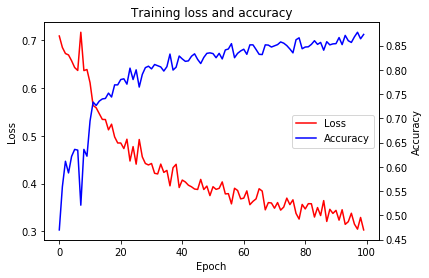

In [34]:
PF.plot_acc_loss(list_train_acc, list_train_loss)

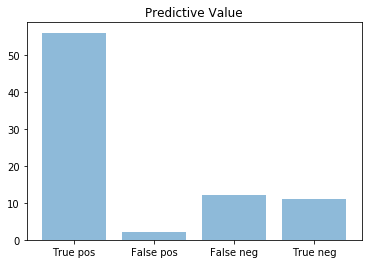

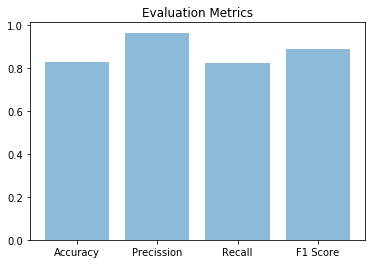

In [35]:
PF.plot_metric(tp, fp, fn, tn)

In [13]:
torch.save(model, "data/model/lstm_model.pt")

In [3]:
import utils.review_checker as review_checker

In [106]:
sent = "aplikasi nggak guna"
review_checker.check(sent)

negative


In [20]:
dataset[5]

{'star': 5,
 'comment': 'the best services in price tiketing compare with other company'}

In [21]:
corpus.dictionary.words[:10]

['goog',
 'thanks',
 'traveloka',
 'tsb',
 'udah',
 'update',
 'no',
 'bug',
 'the',
 'best']

In [17]:
model.word_embeddings(torch.tensor([1]))

tensor([[-0.2060, -0.4012,  0.7832,  0.2629, -0.1298, -0.2708, -1.1152,  0.0543,
          0.3435, -0.9986, -0.4232, -0.8043,  1.7083,  0.4477,  0.5948]],
       grad_fn=<EmbeddingBackward>)